This notebook conducts some exploratory time-series analysis on the ts_2mTemp data.
# Reading the data

In [1]:
filename = r"C:\SUSTech\datasets_of_graduation_project\big_outputs\hetero_of_temp\data_2mtemp_annual90th.h5"

import h5py
with h5py.File(filename, 'r') as f:
    # print(f.keys()) --> <KeysViewHDF5 ['data_2mtemp_annual90th', 'latitudes', 'longitudes', 'years']>
    LATS = f['latitudes'][:]
    LONS = f['longitudes'][:]
    YEARS = f['years'][:]
    DATA_2MTEMP_ANNUAL90TH = f['data_2mtemp_annual90th'][:]
    
    print(LATS.shape, LONS.shape, YEARS.shape, DATA_2MTEMP_ANNUAL90TH.shape)

(47,) (144,) (80,) (80, 47, 144)


In [2]:
print(YEARS)
print(LATS)
print(LONS)

[1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
[90.   89.5  89.   88.5  88.   87.5  87.   86.5  86.   85.5  85.   84.5
 84.   83.5  83.   82.5  82.   81.5  81.   80.5  80.   79.5  79.   78.25
 77.75 77.25 76.75 76.25 75.75 75.25 74.75 74.25 73.75 73.25 72.75 72.25
 71.75 71.25 70.75 70.25 69.75 69.25 68.75 68.25 67.75 67.25 66.5 ]
[-180.   -177.5  -175.   -172.5  -170.   -167.5  -165.   -162.5  -160.
 -157.5  -155.   -152.5  -150.   -147.5  -145.   -142.5  -139.75 -137.25
 -134.75 -132.25 -129.75 -127.25 -124.75 -122.25 -119.75 -117.25 -114.75
 -112.25 -109.75 -107.25 -104.75 -102.25  -99.5   -97.    -94.5   -92.
  -89.5   -87.    -

To access the DATA_2MTEMP_ANNUAL90TH, use `DATA_2MTEMP_ANNUAL90TH[year, lat, lon]`
# Partition of the Arctic region

This partition is from the *AR6 Regions* in the CDS application page `https://atlas.climate.copernicus.eu/atlas`
> **AR6 Regions**: the 6th Assessment Report of the Intergovernmental Panel on Climate Change (IPCC) 

+ Arctic-Ocean
+ Greenland-Iceland
+ N.E.North-America
+ N.W.North-America
+ N.Europe
+ Russian-Arctic

And in each of these regions, some positions are of interest (`(lat, lon)` provided, with positive signs for north and east)
+ Arctic-Ocean: 
  + North Pole (NP): (90, 0)
+ Greenland-Iceland: 
  + Greenland summit camp (GSC): (72.6, -38.4)
+ N.E.North-America: 
  + Canada Alert Station (CAS): (82.5, -62.3)
+ N.W.North-America: 
  + Utqiagvik (named Barrow before 2016) (Utq): (71.3, -156.8)
+ N.Europe: 
  + Ny-Alesund (Nya): (78.9, 11.9)
+ Russian-Arctic: 
  + ​Tiksi (Tik): (71.7, 128.9)
  + ​Northeast Science Station (Chersky) (NESS): (69.5, 161.5)
  + Weather Station of Sterlegova (WSOS): (75.4, 89.2)

Round the lat-lons according to the `lat*lon = 0.5*2.5` grid (the grid is computed and saved by the code in `big_data_paral_compute\big_1_1_cupy.py`)

In [3]:
rprsnttvs__Arctic_Ocean = { # representatives of the Arctic Ocean
    "NP": (90.00, 0.00)
}
rprsnttvs__Greenland_Iceland = {
    "GSC": (72.50, -38.50)
}
rprsnttvs__NE_North_America = {
    "CAS": (82.50, -62.25)
}
rprsnttvs__NW_North_America = {
    "Utq": (71.25, -156.75)
}
rprsnttvs__N_Europe = {
    "Nya": (79.00, 12.00)
}
rprsnttvs__Russian_Arctic = {
    "Tik": (71.75, 129.00), 
    "NESS": (69.50, 161.50), 
    "WSOS": (75.50, 89.25)
}

# Visualization of the representatives

The following code is strangely slow, so we just not use the original msgs data and we just use the existing one: `data_2mtemp_annual90th.h5`.

In [4]:
# import pygrib
# msgs = pygrib.open(r"C:\SUSTech\datasets_of_graduation_project\0220.grib")

In [5]:
# import numpy as np
# from tqdm import tqdm

# def compute_ts_annualAlpha_2mTemp(lat, lon, alpha):
    
#     """
#     Calculate the annual alpha-th percentiles of 2m temperature for a selected position.
    
#     Parameters:
#     lat (float): taking values in [90.00, 89.75, 89.50, ..., 66.50]
#     lon (float): taking values in [-180.00, -179.75, -179.50, ..., 179.75]
#     alpha (float): ...

#     Returns:
#     np.1darray: The annual alpha-th percentile of 2m temperature, with length 80 (1945-2024, 80 years).
#     """
    
#     ts_2mTemp = [] # time series of temperatures of target position
    
    
#     year_1st_indices = [] # the first index of each year in the list ts_2mTemp, used for slicing for annual reduction.
#     current_year = 1945-1
    
#     msgs.rewind()
#     for msg_idx, msg in tqdm(enumerate(msgs), total=140000, desc="Processing GRIB messages", unit="msg"):
#         if int(msg["year"]) > current_year:
#             current_year += 1
#             year_1st_indices.append(msg_idx)
        
#         idx_lat = np.where(msg["distinctLatitudes"] == lat)[0][0]
#         idx_lon = np.where(msg["distinctLongitudes"] == lon)[0][0]

#         ts_2mTemp.append(msg["values"][idx_lat, idx_lon])
        
#     year_1st_indices.append(len(ts_2mTemp)) # the first index of 2025 (remember that the last year in `msgs` is 2024)
#     ts_2mTemp = np.array(ts_2mTemp)
    
#     ts_2mTemp_annualAlpha = [np.percentile(ts_2mTemp[year_1st_indices[year]:year_1st_indices[year+1]], alpha)
#                      for year in range(len(year_1st_indices)-1)]
#     ts_2mTemp_annualAlpha = np.array(ts_2mTemp_annualAlpha)
    
#     return ts_2mTemp_annualAlpha

Get the indices (in LATS, LONS) of target lat-lons

In [6]:
import numpy as np

def get_latlon_indices(lat, lon):
    lat_idx = int(abs(lat-90) / 0.5)
    lon_idx = int(abs(lon-(-180)) / 2.5)
    return lat_idx, lon_idx

## Arctic Ocean

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot_representatives(rprsnttvs__region: str):
    n_rprsnttvs = len(rprsnttvs__region.keys()) 
    n_cols = 1
    n_rows = n_rprsnttvs if n_rprsnttvs > 1 else 2
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    for i, rprsnttv in enumerate(rprsnttvs__region.keys()):
        lat, lon = rprsnttvs__region[rprsnttv]
        lat_idx, lon_idx = get_latlon_indices(lat, lon)
        ts_annual90th_2mTemp = DATA_2MTEMP_ANNUAL90TH[:, lat_idx, lon_idx]
        
        ax[i].plot(YEARS, ts_annual90th_2mTemp)
        ax[i].set_title(rprsnttv)
        ax[i].set_xlabel("Year")
        ax[i].set_ylabel("2m temperature (K)")

The code in the above block can be simply copied to other regions (just change the name of the region)

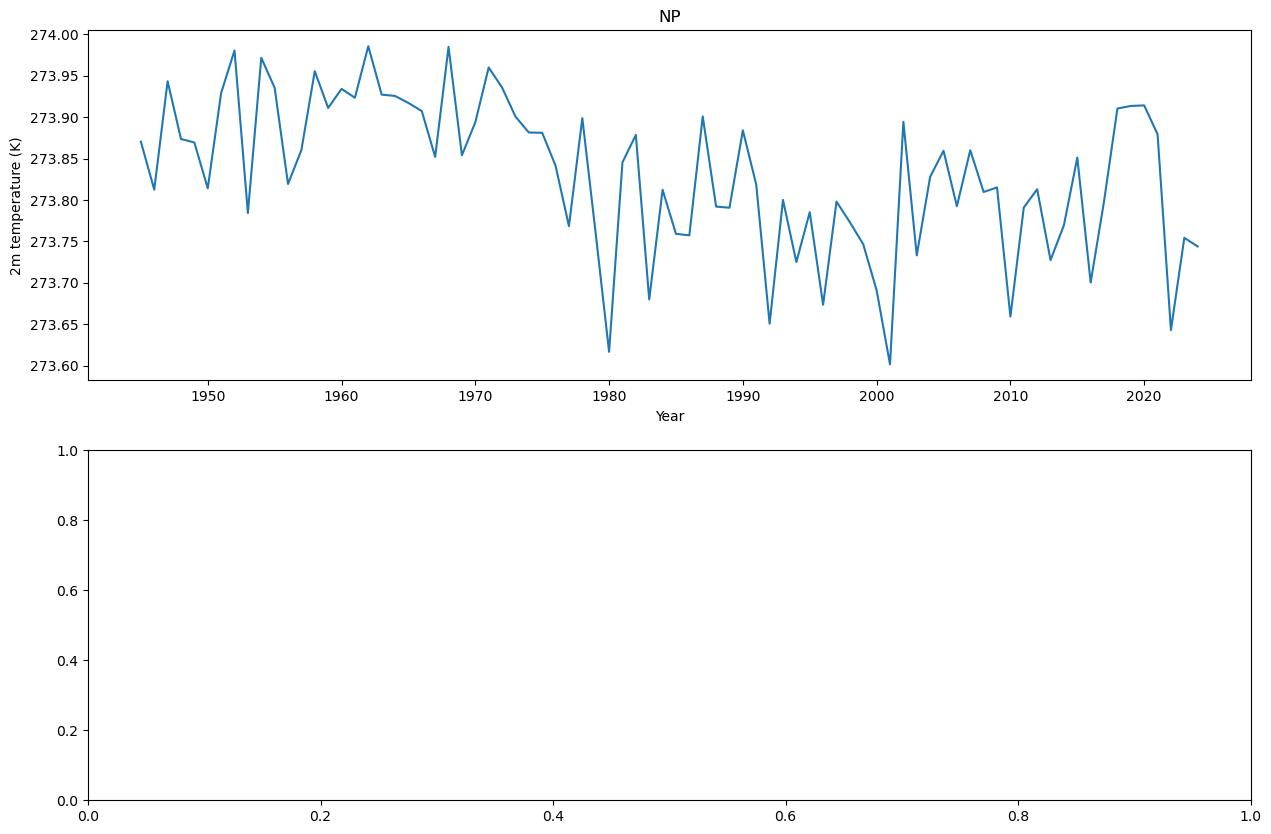

In [25]:
plot_representatives(rprsnttvs__Arctic_Ocean)

## Greenland-Iceland

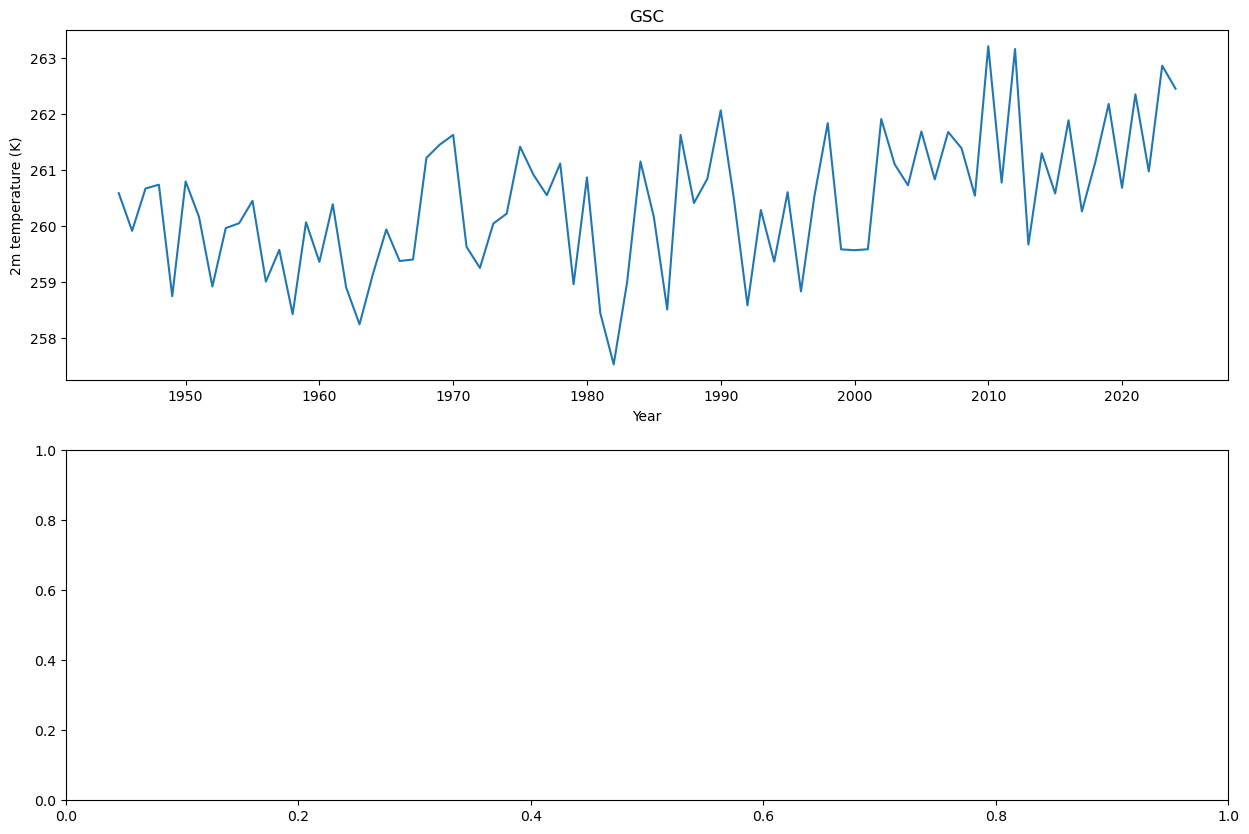

In [26]:
plot_representatives(rprsnttvs__Greenland_Iceland)

## N.E.North-America

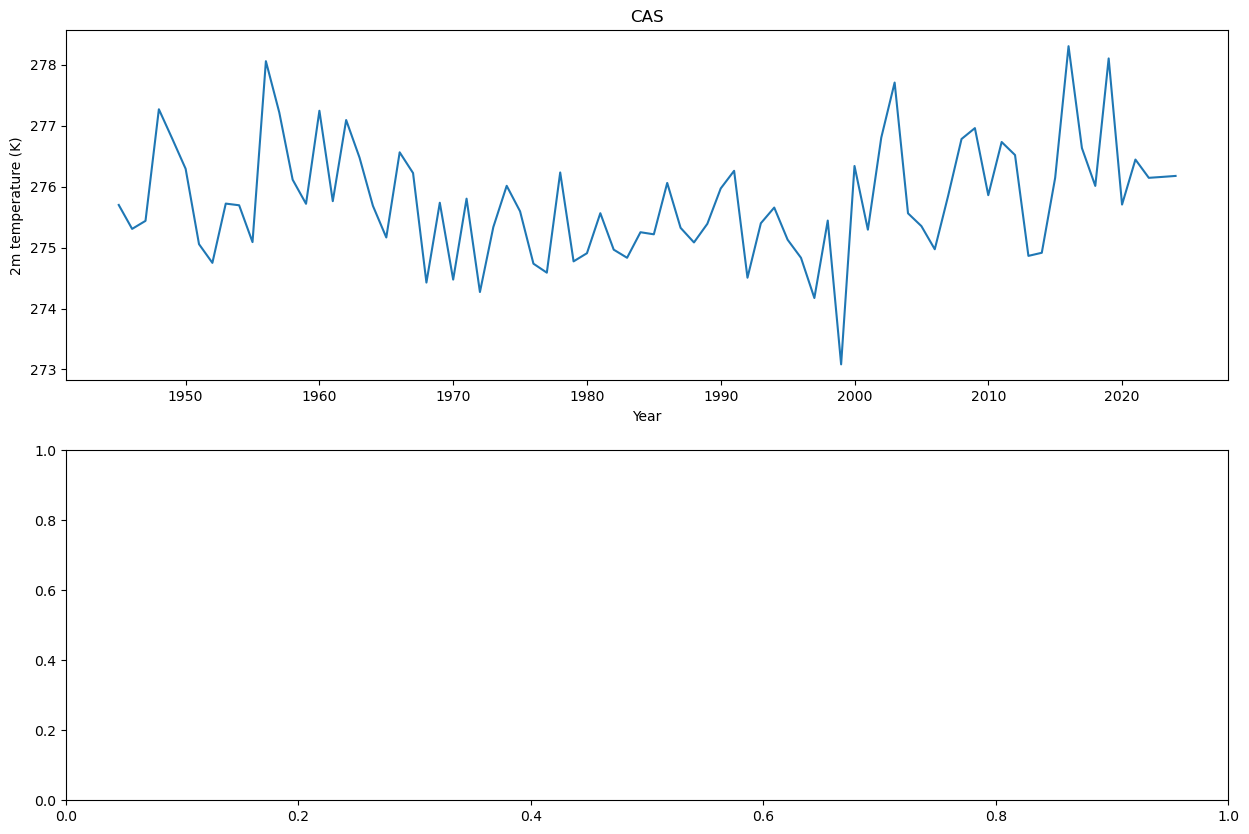

In [27]:
plot_representatives(rprsnttvs__NE_North_America)

## N.W.North-America

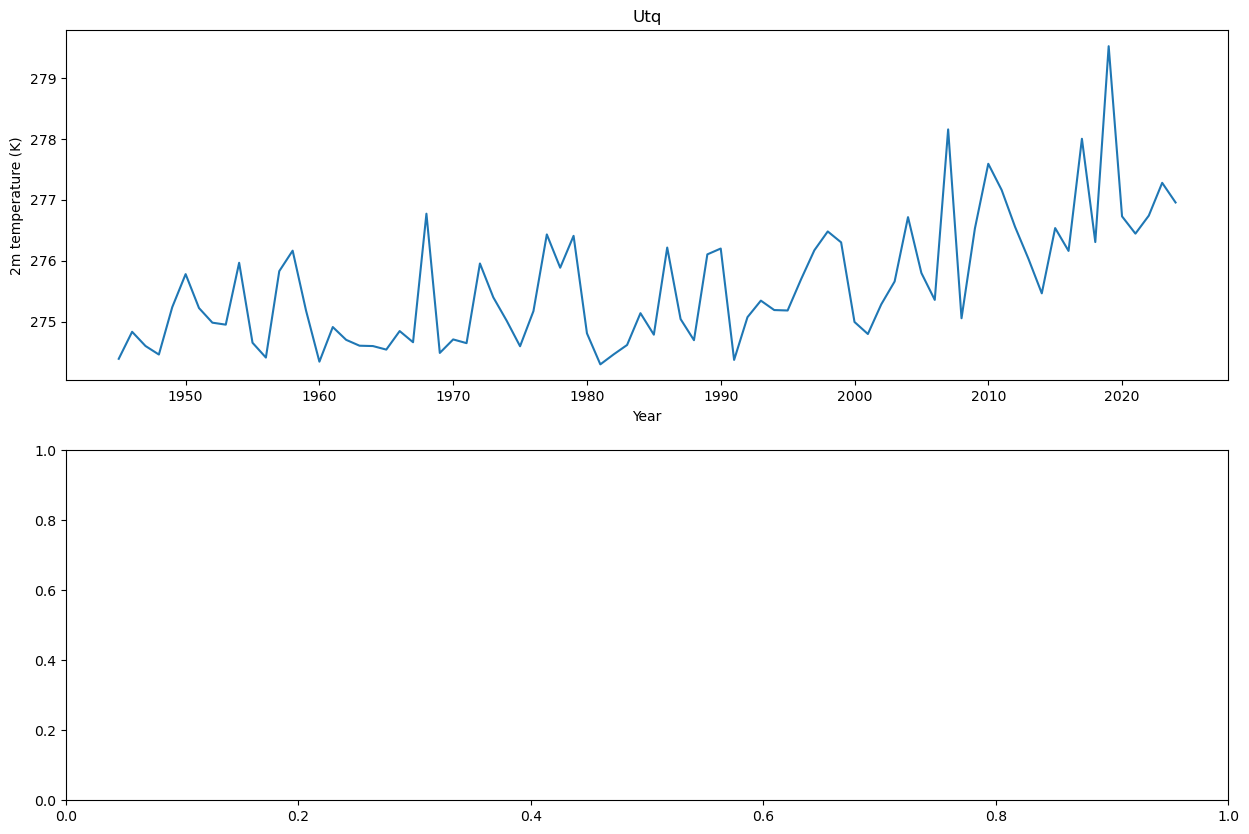

In [28]:
plot_representatives(rprsnttvs__NW_North_America)

## N.Europe

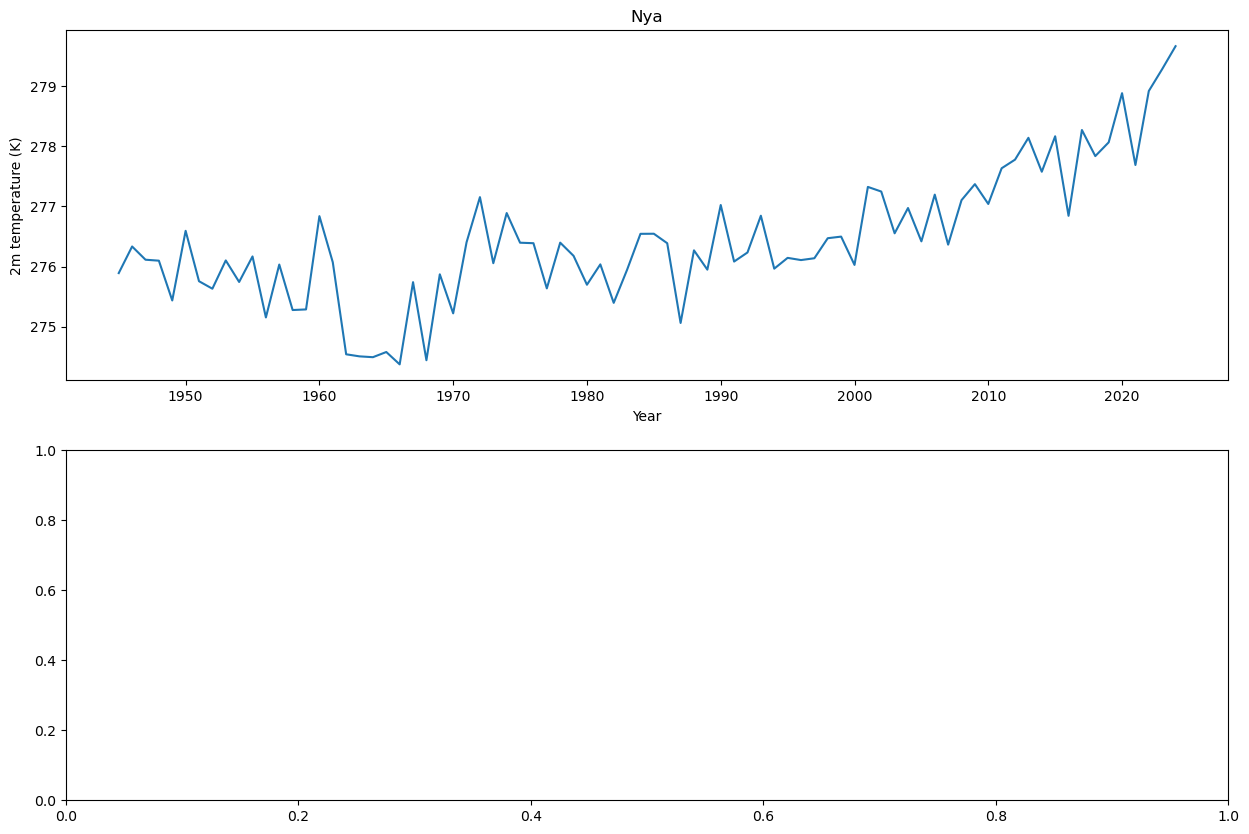

In [29]:
plot_representatives(rprsnttvs__N_Europe)

## Russian-Arctic

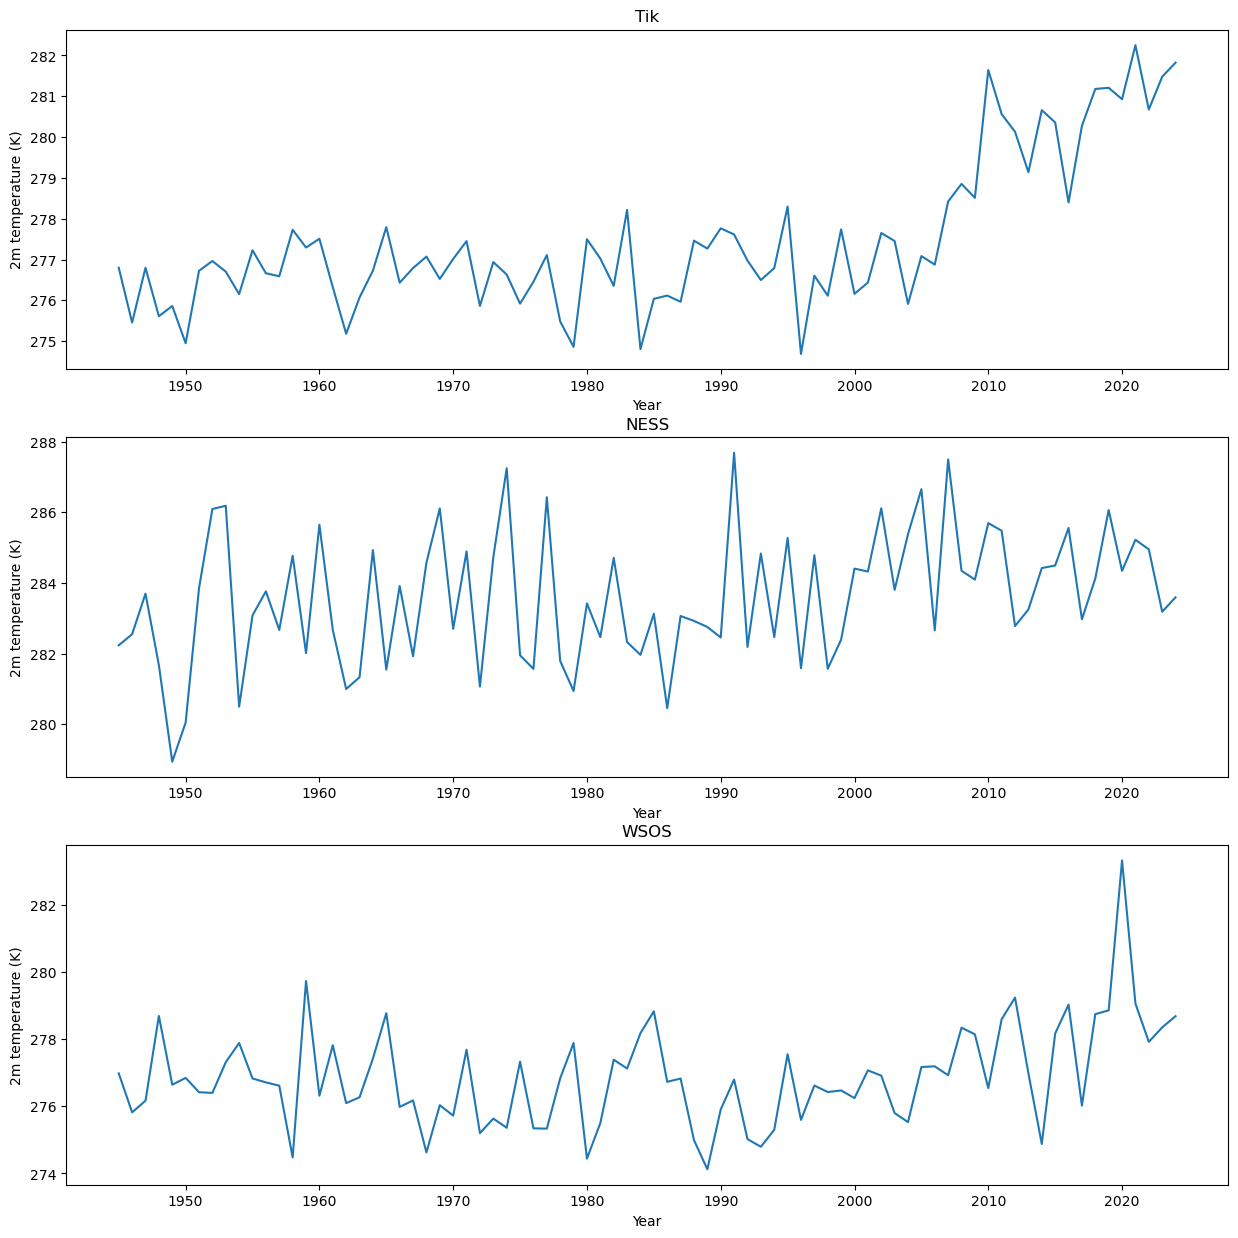

In [30]:
plot_representatives(rprsnttvs__Russian_Arctic)